----------------------------------------
# _Telco churn predicition - EDA_

Telco is a fictional telecom company based in california. The name of the game is to analyze customer behaviour in order to predict churn/retainment. The dataset contains 20 features and one target variable. The dataset can be found on [kaggle](https://www.kaggle.com/blastchar/telco-customer-churn).

There are a total of 20 independent variables/features:

* **Customer ID** - Each customers unique identifier
* **Gender** - The customers sex (M/F)
* **Senior Citizen** - If the customer is senior or not (Y/N)
* **Partner** - If the customer has a partner or not (Y/N)
* **Dependents** - If the customer has dependents (e.g. children) or not (Y/N)
* **Tenure** - Period of time (months) for which the customer has been a customer
* **Phone ervice** - If the customer has a phone service subscription (Y/N)
* **Internet service** - If the customer has a internet service subscription (Y/N)
* **Contract** - Subscription format (month to month, 1-year, 2-year)
* **Paperless billing** - Whether the customer has paperless billing or not (Y/N)
* **Payment method** - How the customer pays their bills (multiple choice)
* **Monthly charges** - How much the customer pays per month
* **Total charges** - how much the customer has payed in total
* **Various** add on packages for internet service (Y/N)
* **Various** streaming services (Y/N)


In [48]:
# Imports

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Paths

# Note : In order to run this code on your machine, make sure the path variable is correct.

path = 'C:\\Users\\victo\\00_Nod_coding_bootcamp\\Week 10\\Project_Telco_churn'
os.chdir(path)
figures = path + '\\Figures\\EDA\\'
data = path + '\\Data\\'

In [49]:
# Figure settings

fig_size = (24,16)
title_size = 30
label_size = 25
tick_size = 20
sns.set_style("darkgrid")

In [59]:
df = pd.read_csv(data + "WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Make columns numeric

In [51]:
df["TotalCharges"] = df.TotalCharges.apply(lambda x: float(x) if x!=' ' else 0)
df["Churn"] = df.Churn.apply(lambda x: 1 if x == "Yes" else 0)

---
## `msno.matrix()`
Check for `NaN` values

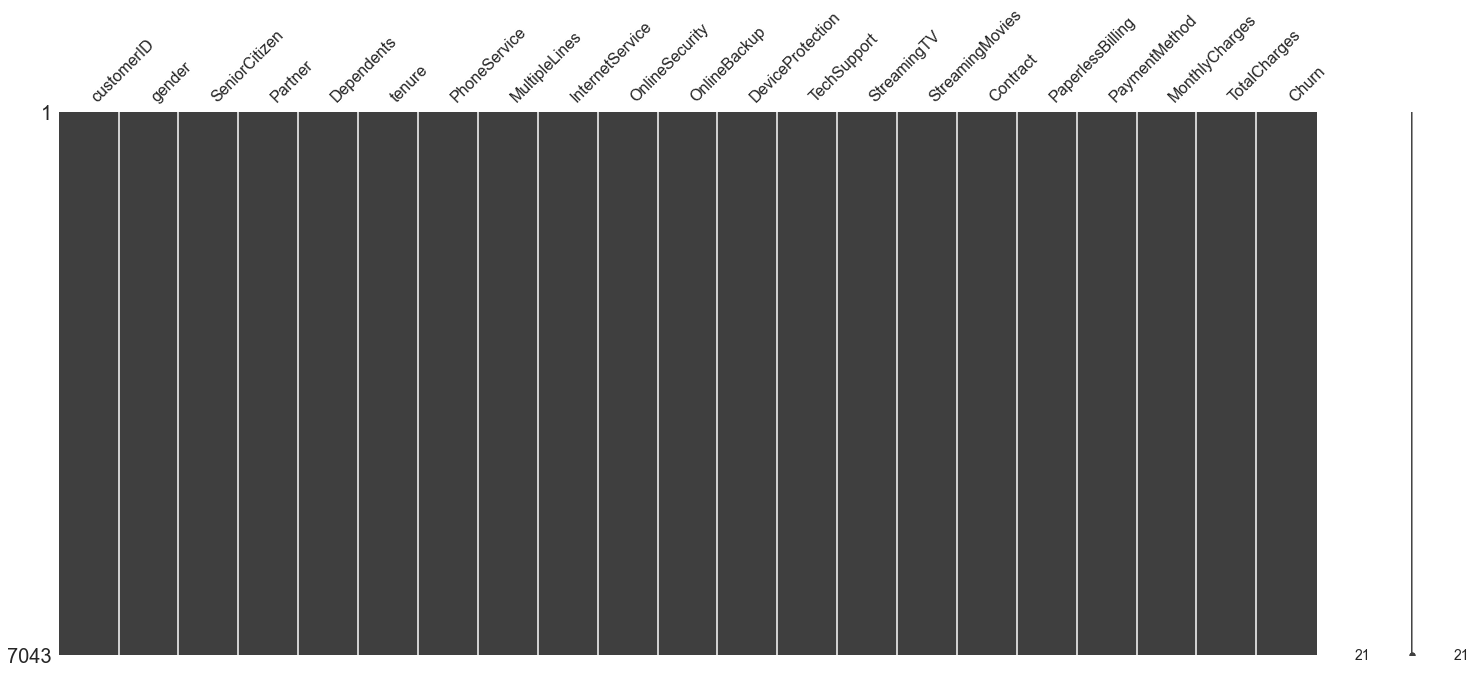

In [52]:
msno.matrix(df)
plt.show()

---
## Check churn/retain balance

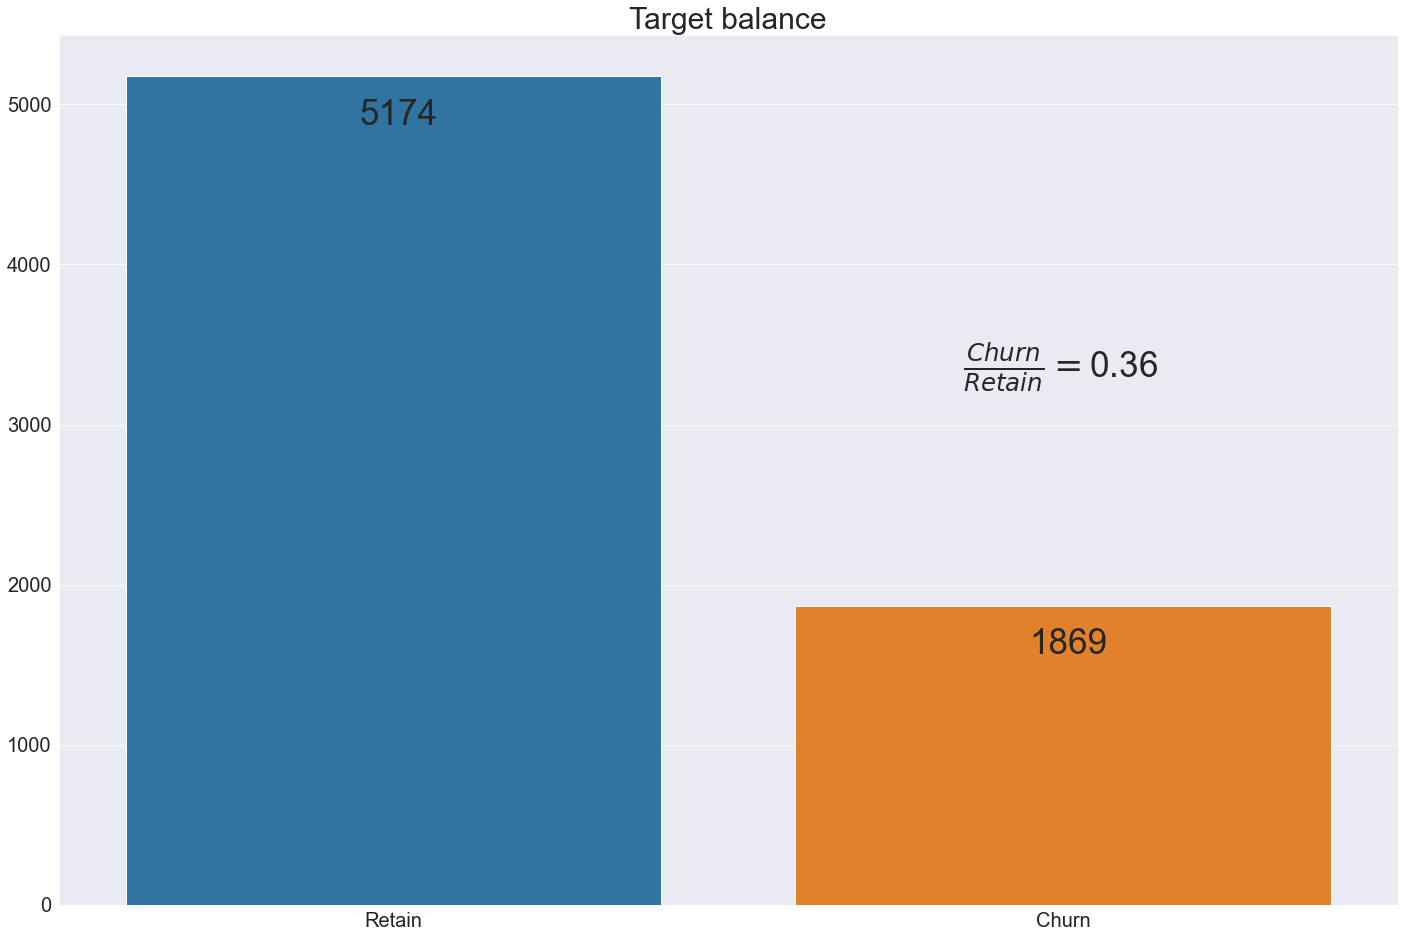

In [53]:
name = 'target_balance'
churn = df.Churn.value_counts()[1]
retain = df.Churn.value_counts()[0]

plt.figure(figsize = fig_size)

sns.barplot(x = ["Retain", "Churn"], y = [retain, churn])

plt.title("Target balance", size = title_size)
plt.xticks(size = tick_size)
plt.yticks(size = tick_size)
plt.annotate(r"$\frac{Churn}{Retain}=$"+f"{round(churn/retain,2)}", xy = (0.85,3300), size = 35)
plt.annotate(f"{retain}", xy = (-0.05, retain - 300), size = 35)
plt.annotate(f"{churn}", xy = (0.95, churn - 300), size = 35)

plt.savefig(figures+name)
plt.show()

---
## The dataset does not seem to be significantly imbalanced

This will be important for future machine learning analysis. Lets move on to an overview of variable relationships

In [54]:
dummy_df = pd.get_dummies(df.drop(columns="customerID"), drop_first = True)

An initial overview of a seaborn scatterplot (very messy, not displayed here) shows that there may be some interesting relationships to look at:

 * monthly charges vs. total charges
 * tenure vs total charges
 * tenure vs monthly charges
 
These relationships are for continuous features.

## Lets look at some scatterplots with fitted regression lines for the customers who churn/retain.

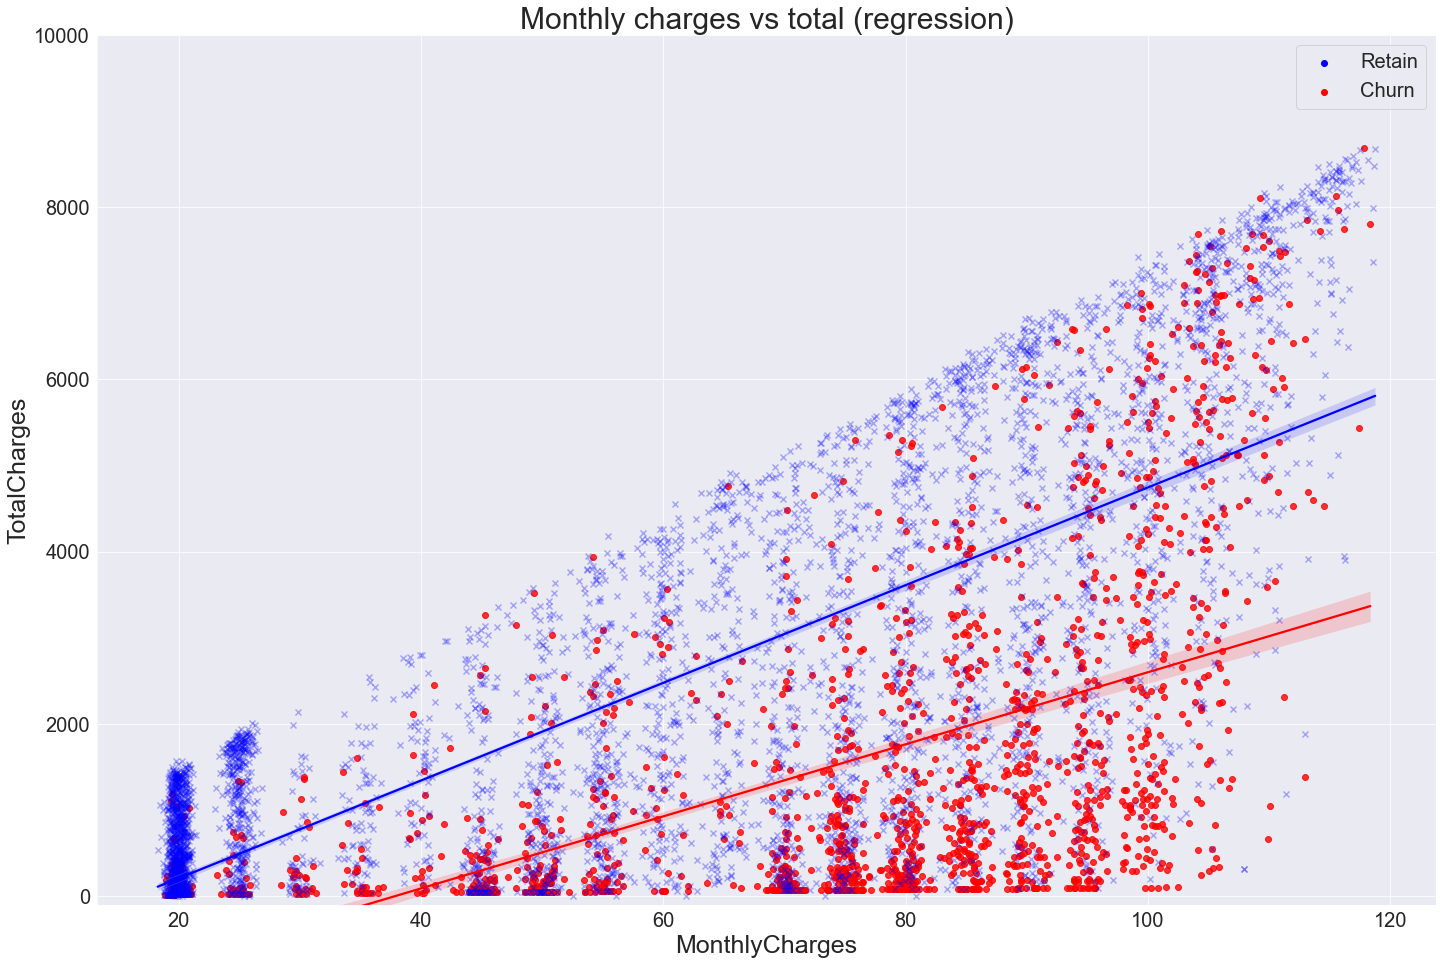

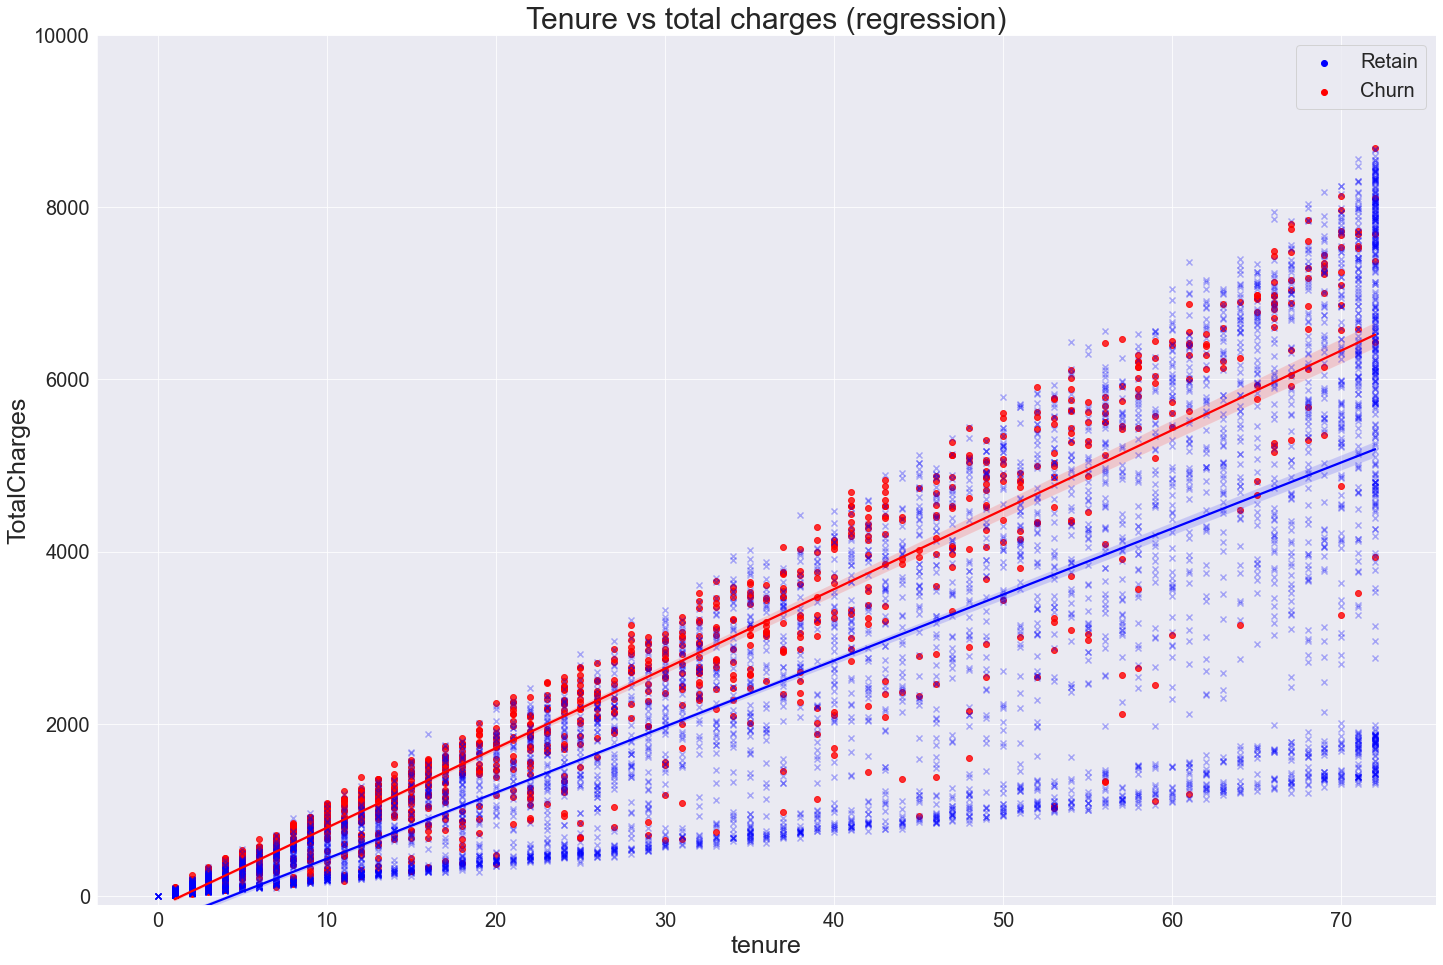

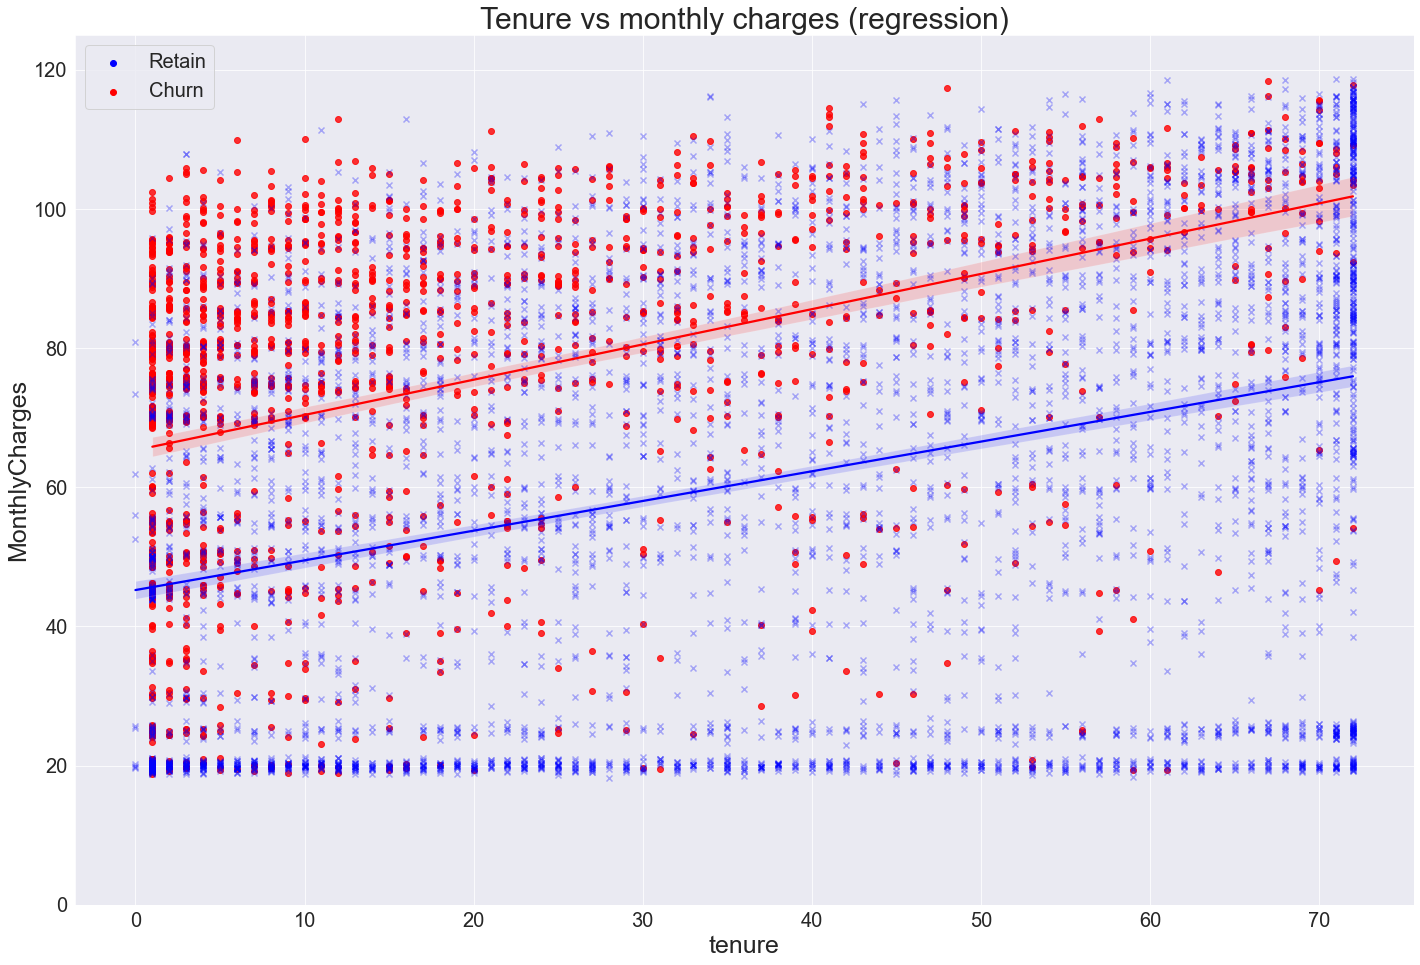

In [55]:

# Parameter for controlling regression lines in plots

reg = True

x = ['MonthlyCharges', 'tenure', 'tenure']
y = ['TotalCharges', 'TotalCharges', 'MonthlyCharges']
ylims = [(-100,10000),(-100,10000),(0,125)]

for i in range(0,3):

    plt.figure(figsize=fig_size)
    
    # Plots
    if reg == True:
        
        names = ["Monthly_charges_vs_total_(regression)",
                 'Tenure_vs_total_charges_(regression)',
                 "Tenure_vs_monthly_charges_(regression)"]
        
        ax = sns.regplot(data = df.loc[df.Churn==1],
                         x = x[i],
                         y = y[i],
                         color = "red")
        
        ax = sns.regplot(data = df.loc[df.Churn==0],
                         x = x[i]
                         , y = y[i],
                         color = "blue",
                         scatter_kws = {'alpha':0.3},
                         marker = "x")
        
        ax = sns.scatterplot(x = df[x[i]],
                             y = df[y[i]],
                             hue = df.Churn,
                             legend = "full",
                             alpha=0,
                             palette = ["blue", "red"])
        
    else:
        
        names = ["Monthly_charges_vs_total",
                         'Tenure_vs_total_charges',
                         "Tenure_vs_monthly_charges"]
        
        ax = sns.scatterplot(x = df.loc[df.Churn==1][x[i]],
                             y = df.loc[df.Churn==1][y[i]],
                             hue = df.Churn,
                             legend = "full",
                             alpha=1,
                             palette = ["blue", "red"])
        
        ax = sns.scatterplot(x = df.loc[df.Churn==0][x[i]],
                             y = df.loc[df.Churn==0][y[i]],
                             hue = df.Churn,
                             legend = "full",
                             alpha=0.4,
                             palette = ["blue", "red"],
                             marker = 'x')
        
    
    # Set text
    
    name = names[i]
    plt.title(name.replace("_"," "), size = title_size)
    plt.ylim(ylims[i])
    plt.xlabel(x[i], size = label_size)
    plt.ylabel(y[i], size = label_size)
    plt.xticks(size = tick_size)
    plt.yticks(size = tick_size)
    
    # Set legend
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['Retain', 'Churn'], prop={"size":20})
    
    # Save figure
    
    plt.savefig(figures+'Scatter\\'+names[i])

# Handle outliers in scatterplot data
Focus on total charges

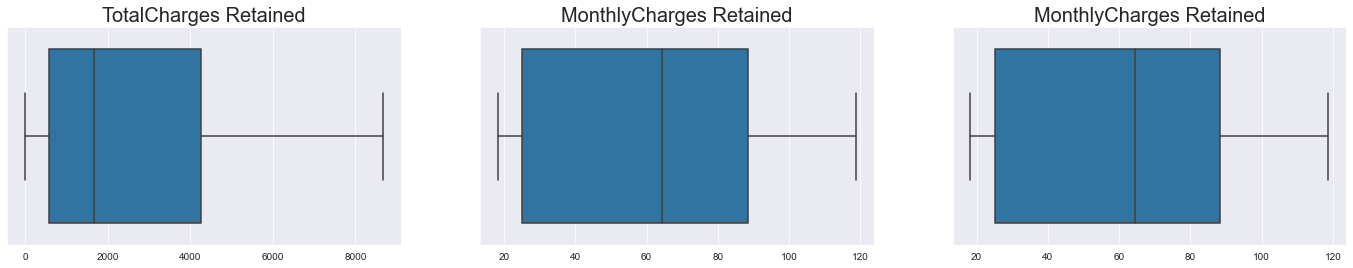

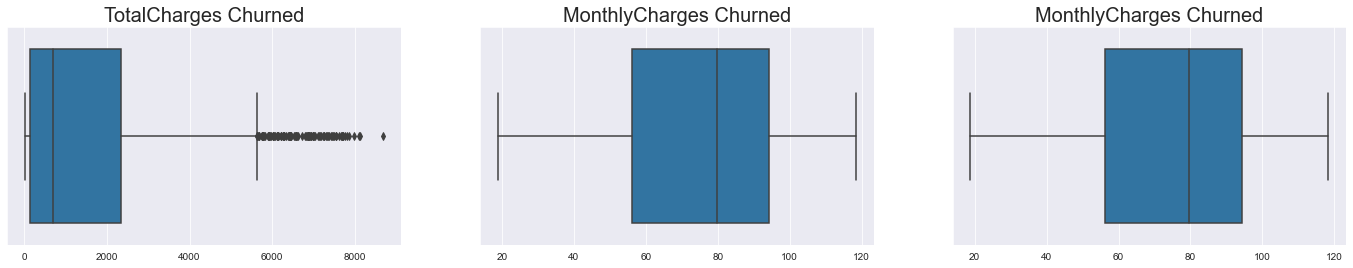

In [56]:
y = ['TotalCharges', 'MonthlyCharges', 'MonthlyCharges']
fig, ax = plt.subplots(1,3, figsize = (24,4))

for i in range(0,3):    
    # Get a boxplot
    sns.boxplot(data = df.loc[df.Churn==0], x = y[i], ax = ax[i], whis = 1.5, orient = "h", )
    ax[i].set_title(f"{y[i]} Retained", size = title_size-10)
    ax[i].set_xlabel(xlabel = "")
    
plt.savefig(figures + 'outliers_retain')

fig, ax = plt.subplots(1,3, figsize = (24,4))

for i in range(0,3):    
    # Get a boxplot
    sns.boxplot(data = df.loc[df.Churn==1], x = y[i], ax = ax[i], whis = 1.5, orient = "h")
    ax[i].set_title(f"{y[i]} Churned", size = title_size-10)
    ax[i].set_xlabel(xlabel = "")
    
plt.savefig(figures + 'outliers_churn')

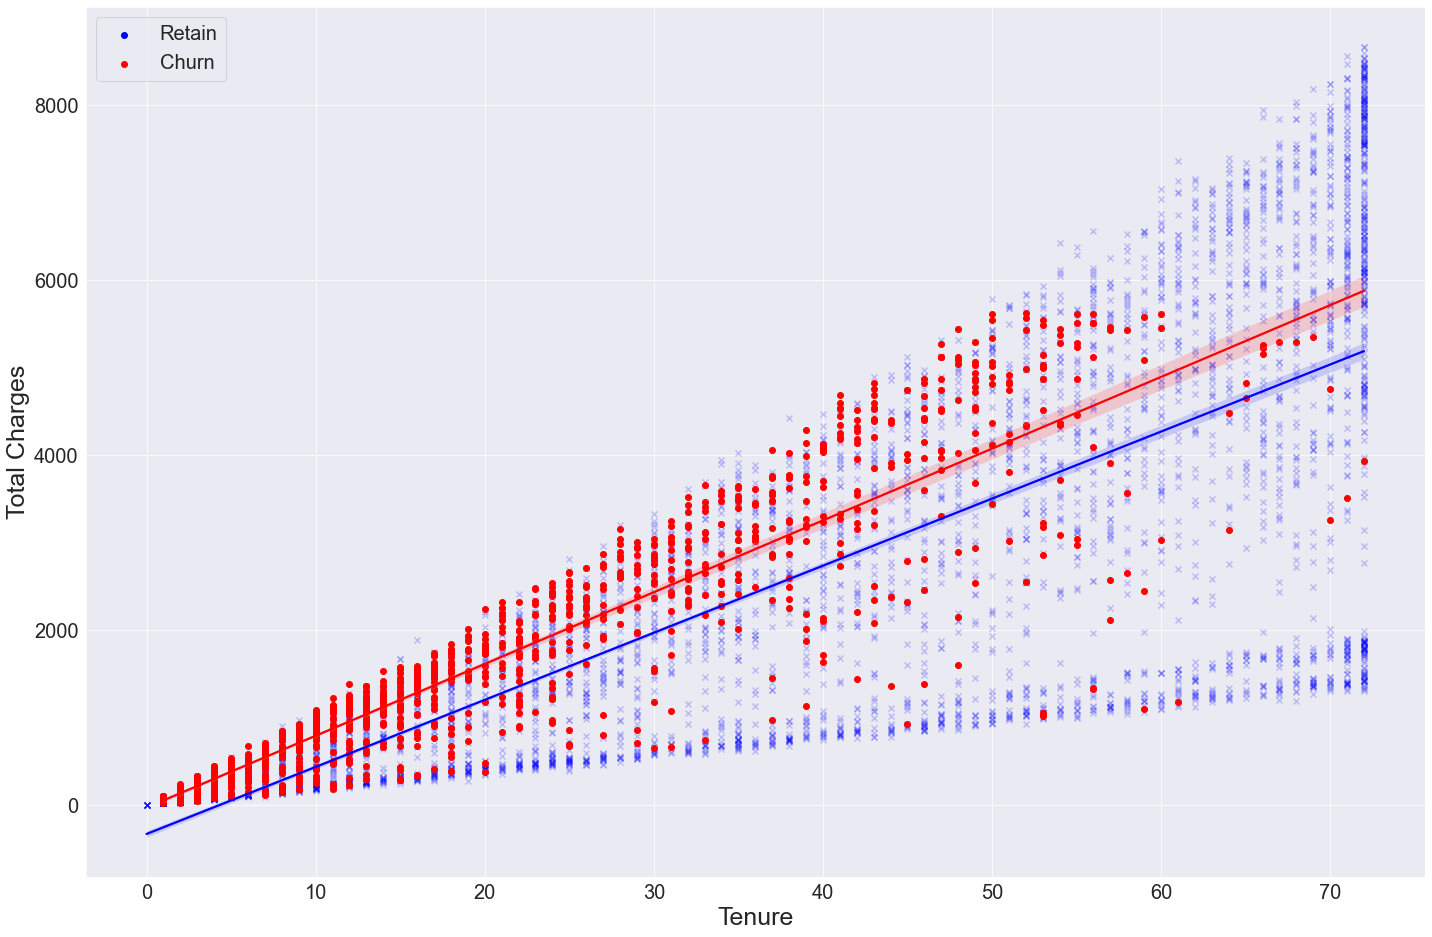

In [57]:
# Remove outliers in total charges after grouping for churn/retain

name = 'tenure_vs_total_reg_no_outliers'
plt.figure(figsize=fig_size)
colors = ["blue","red"]
alpha = [0.2,1]
markers = ["x","o"]

for i in range(0,2):
    df_temp = df.loc[df.Churn==i].copy()
    Q3 = df_temp.TotalCharges.describe()["75%"]
    Q1 = df_temp.TotalCharges.describe()["25%"]
    IQR = Q3-Q1
    uf = Q3 + 1.5*IQR
    lf = Q1 - 1.5*IQR
    df_temp["TotalCharges"] = df_temp.TotalCharges.apply(lambda x: x if (x>=lf and x<=uf) else np.nan)
    df_temp.dropna(inplace=True)
    df_temp.reset_index(inplace=True, drop=True)
    ax = sns.regplot(data = df_temp,
                     x = "tenure",
                     y = "TotalCharges",
                     color=colors[i],
                     scatter_kws = {"alpha":alpha[i]},
                     marker = markers[i])
    
ax = sns.scatterplot(x = df[x[i]], y = df[y[i]], hue = df.Churn, legend = "full", alpha=0, palette = ["blue", "red"])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Retain', 'Churn'], prop={"size":20})
plt.xlabel("Tenure",size = label_size)
plt.ylabel("Total Charges",size = label_size)
plt.xticks(size = tick_size)
plt.yticks(size = tick_size)
plt.savefig(figures + name)

### Findings

Retain/churn seems to be grouped when viewed in the context of charges. This becomes more clear when viewed as a function of tenure. Specifically, customers that have a long tenure tend to churn if they have a paid more in total. This seems fairly expected, and would reflect early customers who have not received offers/reduced pricing options that shipped after they signed. In other words, the indication is that customers at some point will overview competitors and may find a better deal.

These findings seem to hold even after handling outliers.

---
# Further examination of correlations seem to indicate that churn is mostly correlated (+ / -) with

* Tenure
* Contract_two year (the customer contract spans 2 years)
* No internet service (phone only)
* Various services not being available as a consequence of not having an internet service plan:

    - Online backup
    - Streaming services
    - Support
    - etc.
* Fiber optic service
* Payment method
* Monthly charges
* Total Charges

In [58]:
# Check absolute values of correlation to churn for all variables

corrs = np.abs(dummy_df.corr()["Churn"]).sort_values(ascending = False)[1:]
corrs

tenure                                   0.352229
InternetService_Fiber optic              0.308020
Contract_Two year                        0.302253
PaymentMethod_Electronic check           0.301919
OnlineBackup_No internet service         0.227890
DeviceProtection_No internet service     0.227890
TechSupport_No internet service          0.227890
StreamingMovies_No internet service      0.227890
InternetService_No                       0.227890
OnlineSecurity_No internet service       0.227890
StreamingTV_No internet service          0.227890
TotalCharges                             0.198324
MonthlyCharges                           0.193356
PaperlessBilling_Yes                     0.191825
Contract_One year                        0.177820
OnlineSecurity_Yes                       0.171226
TechSupport_Yes                          0.164674
Dependents_Yes                           0.164221
SeniorCitizen                            0.150889
Partner_Yes                              0.150448


### Further exploration of top 3 correlated features (excluding tenure). Simple scatterplots of churn vs. features

In [43]:
features = corrs.index[1:4]

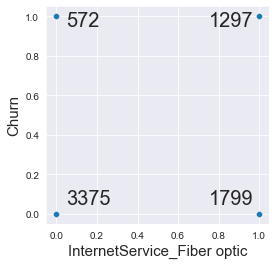

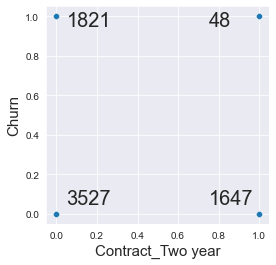

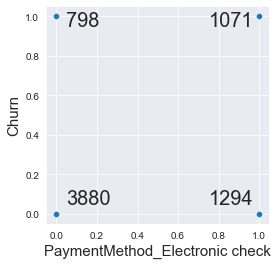

In [44]:
for i in features:
    
    plt.figure(figsize = (4,4))
    sns.scatterplot(data = dummy_df, x = dummy_df[i], y = dummy_df.Churn)
    plt.xlabel(xlabel = i, size = 15)
    plt.ylabel(ylabel = "Churn", size = 15)
    
    if i!="tenure":
        
        plt.annotate(xy = (0 + 0.05,0 + 0.05),
                     text = f"{dummy_df.loc[(dummy_df[i]==0) & (dummy_df.Churn==0)].shape[0]}", size = 20)
        plt.annotate(xy = (1 - 0.25, 0 + 0.05),
                     text = f"{dummy_df.loc[(dummy_df[i]==1) & (dummy_df.Churn==0)].shape[0]}", size = 20)
        plt.annotate(xy = (1 - 0.25, 1 - 0.05),
                     text = f"{dummy_df.loc[(dummy_df[i]==1) & (dummy_df.Churn==1)].shape[0]}", size = 20)
        plt.annotate(xy = (0 + 0.05,1 - 0.05),
                     text = f"{dummy_df.loc[(dummy_df[i]==0) & (dummy_df.Churn==1)].shape[0]}", size = 20)

### Additional findings
Customers who do not have internet service are more likely to churn. Most of the features described above state this same fact. An interesting additional find however is that among customers who churn, the majority do not have a 2 year contract. Also, they tend to churn more often if they _**do have**_ fiber optic service.

# Check how churned clients are distributed over tenure

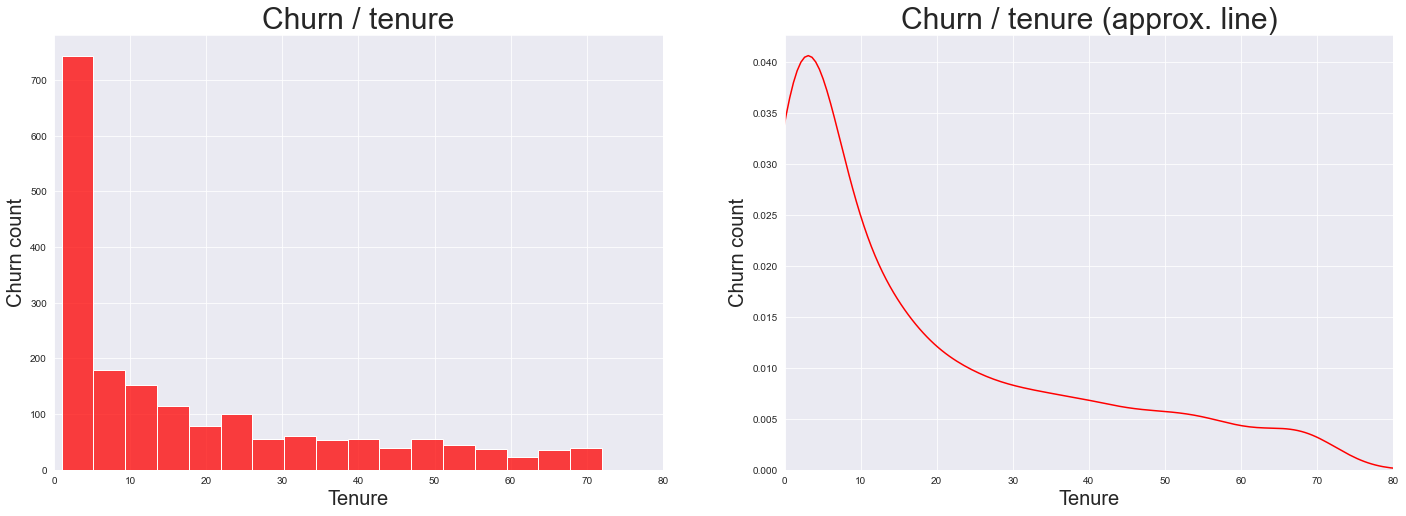

In [45]:
x = df.loc[df.Churn==1].tenure

name = 'Histogram_churn_vs_tenure'

fig, ax = plt.subplots(1,2, figsize = (24,8))

sns.histplot(x = x, ax = ax[0], color="red")
ax[0].set_title("Churn / tenure", size = title_size)
ax[0].set_xlabel("Tenure",size = label_size-5)
ax[0].set_ylabel("Churn count", size = label_size-5)
ax[0].set_xlim((0,80))

sns.kdeplot(x = x, ax = ax[1], color = "red")
ax[1].set_title("Churn / tenure (approx. line)", size = title_size)
ax[1].set_xlabel("Tenure",size = label_size-5)
ax[1].set_ylabel("Churn count", size = label_size-5)
ax[1].set_xlim((0,80))

plt.savefig(figures + name)

### Insight
Churned customers overall tend to churn earlier in their tenure

# Conclusions
* Customers seem most likely to churn early on in their subscription
* Customers who churn later on tend to do so if they have higher monthly/total costs
* It is more likely that a customer churns if they don't have an internet service plan
* Customers are _more_ likely to churn if they have fiber optic internet service, which may indicate that customers with higher demands are more likely to go to a competitor

### Important questions to answer
* Why do customers tend to churn very early on?
* What is the explanation for the vast differences in monthly payments for customers with high tenure, and can any relationship be established which can in turn help explain churns?